<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/ML_With_Python/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EB%85%B8%EB%93%9C6_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# 데이터 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset() # 훈련, 예측, 학습, 검증 데이터 세트 생성
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [147]:
# 훈련 샘플 확인
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [148]:
# 타겟(학습) 샘플 확인
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

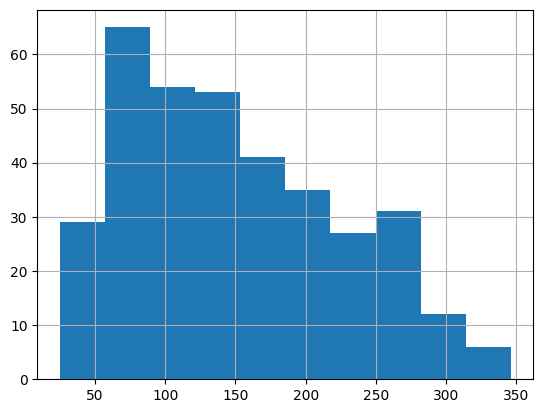

In [149]:
# 타겟 확인
y_train.hist()

In [150]:
# 선형 회귀 모델
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

2707.6318521641583

In [151]:
# 릿지 회귀 (alpha=1)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
model = Ridge(alpha=1) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

3522.1191842072667

In [152]:
# 릿지 회귀 계수 확인 (alpha=1)
model.coef_ # 계수의 순서는 피치의 순서와 동일
coef = pd.DataFrame(data=model.coef_ , index=X_train.columns, columns=['alpha=1'])
coef

,alpha=1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [153]:
# 릿지 회귀 (alpha = 10)
model = Ridge(alpha=10) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

5521.884843903383

In [154]:
# 회귀 계수 (alpha = 10)
coef['alpha_10'] = model.coef_
coef

,alpha=1,alpha_10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [155]:
# 릿지 회귀 (alpha = 0.1)
model = Ridge(alpha=0.1) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

2744.9026742146693

In [156]:
# 회귀 계수 (alpha = 0.1)
coef['alpha_0.1'] = model.coef_
coef

,alpha=1,alpha_10,alpha_0.1
age,31.293421,16.703166,4.275162
sex,-71.448655,-1.796418,-205.210484
bmi,267.605962,61.026376,450.909749
bp,197.362492,47.434846,331.923682
s1,14.613257,18.491238,-84.311149
s2,-13.884237,13.440104,-54.662514
s3,-124.649836,-35.542087,-158.706512
s4,106.212967,38.896140,114.066890
s5,221.068493,55.276290,391.231834
s6,101.202546,35.868345,78.555458


In [157]:
# 릿지 회귀 (alpha = 0.01)
model = Ridge(alpha=0.01) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

2675.811312404543

In [158]:
# 회귀 계수 (alpha = 0.01)
coef['alpha_0.01'] = model.coef_
coef

,alpha=1,alpha_10,alpha_0.1,alpha_0.01
age,31.293421,16.703166,4.275162,-7.293063
sex,-71.448655,-1.796418,-205.210484,-242.212217
bmi,267.605962,61.026376,450.909749,482.043260
bp,197.362492,47.434846,331.923682,365.353880
s1,14.613257,18.491238,-84.311149,-441.489567
s2,-13.884237,13.440104,-54.662514,206.076459
s3,-124.649836,-35.542087,-158.706512,-24.375056
s4,106.212967,38.896140,114.066890,141.806880
s5,221.068493,55.276290,391.231834,561.312338
s6,101.202546,35.868345,78.555458,58.588744


In [159]:
# Q. 릿지 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
# 힌트 : for문을 사용하면 좀더 효율적으로 퀴즈를 풀 수 있습니다.
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_values = [0.001, 0.01, 0.05, 0.1, 1, 10]

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)

    print("MSE (alpha=" + str(alpha) + "):", mse)
    print()


MSE (alpha=0.001): 2698.04060695702

MSE (alpha=0.01): 2675.811312404543

MSE (alpha=0.05): 2699.6595785438317

MSE (alpha=0.1): 2744.9026742146693

MSE (alpha=1): 3522.1191842072667

MSE (alpha=10): 5521.884843903383



In [160]:
# 라쏘 회귀 (alpha=1)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
model = Lasso(alpha=1) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증
# 4179.152642946343

4179.152642946343

In [161]:
# 라쏘 회귀 계수 확인 (alpha=1)
model.coef_ # 계수의 순서는 피치의 순서와 동일
coef = pd.DataFrame(data=model.coef_ , index=X_train.columns, columns=['alpha=1'])
coef

,alpha=1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [162]:
# 라쏘 회귀 (alpha=2)
model = Lasso(alpha=2) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

6398.637179449031

In [163]:
# 라쏘 회귀 계수 (alpha=2)
coef['alpha_2'] = model.coef_
coef

,alpha=1,alpha_2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [164]:
# 라쏘 회귀 (alpha=0.05)
model = Lasso(alpha=0.05) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

2703.4583679188177

In [165]:
# 라쏘 회귀 계수 (alpha=0.05)
coef['alpha_0.05'] = model.coef_
coef

,alpha=1,alpha_2,alpha_0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


In [168]:
# Q. 라쏘 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha_values = [0.001, 0.01, 0.05, 0.1, 1, 10]

for alpha in alpha_values:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)

    print("MSE (alpha=" + str(alpha) + "):", mse)
    print()

MSE (alpha=0.001): 2701.7138710371505

MSE (alpha=0.01): 2676.3872487581543

MSE (alpha=0.05): 2703.4583679188177

MSE (alpha=0.1): 2775.186402991066

MSE (alpha=1): 4179.152642946343

MSE (alpha=10): 6595.844885678807



In [169]:
# 엘리스틱 회귀 (alpha=1)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증
# 6539.270961171604

6539.270961171604

In [178]:
# 엘리스틱 회귀 (alpha=0.0001)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6) # alpha의 기본값은 1, l1_ratio, l2_ration 기본값은 0.5:0.5
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증
# 2676.6433555725375

2675.6031657225312

In [181]:
# Q. 엘라스틱넷 회귀의 alpha 값을 0.0001로 설정하고,
# l1 규제의 비율 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 중
# 어떤 비율일 때 mean squared error가 가장 작은지 찾아보세요.
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

alpha = 0.0001
l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for l1 in l1_ratio:
    model = ElasticNet(alpha=alpha, l1_ratio=l1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)

    print("MSE (alpha=" + str(l1) + "):", mse)


MSE (alpha=0.1): 2685.1346988294986
MSE (alpha=0.2): 2682.6456826176523
MSE (alpha=0.3): 2680.341973452156
MSE (alpha=0.4): 2678.299021563081
MSE (alpha=0.5): 2676.6433555725375
MSE (alpha=0.6): 2675.6031657225312
MSE (alpha=0.7): 2675.631032350049
MSE (alpha=0.8): 2677.65128770134
MSE (alpha=0.9): 2684.6233839896468


In [187]:
# 랜덤포레스트 회귀
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(random_state=0)

model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # MSE
# 3228.29922247191

3228.29922247191

In [185]:
# xgboost 회귀
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # MSE

4027.9957827295916

In [188]:
# Q. 다음 빈칸을 채워서 랜덤포레스트와 xgboost 모델의 mse 값을 비교해보세요.
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model_r = RandomForestRegressor()
model_r.fit(X_train, y_train)
pred_r = model_r.predict(X_test)
print("랜덤포레스트")
print(mean_squared_error(y_test, pred_r))

model_x = XGBRegressor()
model_x.fit(X_train, y_train)
pred_x = model_x.predict(X_test)
print("xgboost")
print(mean_squared_error(y_test, pred_r))

랜덤포레스트
3147.8387415730335
xgboost
3147.8387415730335


In [189]:
# 하이퍼파라미터 튜닝
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [190]:
# 튜닝 대상 하이퍼파라미터 지정
params = {'learning_rate': [0.07, 0.05],
          'max_depth': [3, 5, 7],
          'n_estimators': [100, 200],
          'subsample': [0.9, 0.8, 0.7]
          }

In [192]:
# 데이터셋 로드
from sklearn.datasets import load_breast_cancer
def make_dataset2():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2() # X_train: 훈련, X_test: 예측, y_train:학습, y_test:검증

In [198]:
# GridSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor() # model 생성
grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [199]:
# 최적의 하이퍼파라미터를 찾음 => 비용 & 시간 많이 소모
grid.best_params_

{'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

In [202]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.07,
    max_depth = 3,
    n_estimators = 200,
    subsample = 0.8
    )

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)
# 3467.3127582478055

3467.3127582478055

In [203]:
# Random Search
from xgboost import XGBRegressor
xgb = XGBRegressor() # model 생성
grid = RandomizedSearchCV(xgb, params, cv=5, n_iter = 10, n_jobs=-1)
grid.fit(X, y)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [204]:
# 최적의 하이퍼파라미터를 찾음 => N개의 조합만 탐색, 시간 내 최적의 하이퍼파라미터 탐색
grid.best_params_

{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.07}

In [205]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.07,
    max_depth = 3,
    n_estimators = 200,
    subsample = 0.8
    )

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)
# 3467.3127582478055 GridSearchCV와 동일한 MSE

3467.3127582478055

In [206]:
# 회귀 평가 지표
# MAE(Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

49.19943575912647

In [208]:
# 회귀 평가 지표
# MSE(Mean Squared Error)
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, pred)

In [210]:
# 회귀 평가 지표
# RMSE(Root Mean Squared Error)
import numpy as np
rmse = np.sqrt(mse)
rmse

58.88389217984665

In [213]:
# 회귀 평가 지표
# RMSLE(Root Mean Squared Log Error)
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, pred))
rmsle

0.4476197743922463

In [214]:
# 회귀 평가 지표
# R^2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.47043868705368386

In [ ]:
# 데이터셋 로드
import pandas as pd
from sklearn.datasets import load_breast_cancer
def make_dataset2():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    return df.drop('target', axis=1), df['target']

X, y = make_dataset2() # X_train: 훈련, X_test: 예측, y_train:학습, y_test:검증

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)

# 튜닝 대상 하이퍼파라미터 지정
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
          'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
          }

# 라이브러리 불러오기
from sklearn.model_selection import RandomizedSearchCV

# Random Search
from xgboost import XGBRegressor
xgb = XGBRegressor() # model 생성
grid = RandomizedSearchCV(xgb, params, cv=5, n_iter = 10, n_jobs=-1)
grid.fit(X, y)

# 최적의 하이퍼파라미터를 찾음 => N개의 조합만 탐색, 시간 내 최적의 하이퍼파라미터 탐색
grid.best_params_
# {'l1_ratio': 0.4, 'alpha': 1}

import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet(alpha=1, l1_ratio=0.4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse